## Air Quality - Regression

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

filePath = 'D:\\Personal\\Study\\Bits Pilani\\Git\\python-basic-1\\Regression\\air-quality\\AirQuality.xlsx'
airQualityData = pd.read_excel(filePath) #Load csv in Dataframe



#### Cleansing data

In [93]:
# replace -200 values with mean value in column "NOx(GT)"
temp = airQualityData[airQualityData["NOx(GT)"] != -200]["NOx(GT)"]
airQualityData["NOx(GT)"] = airQualityData["NOx(GT)"].replace(-200,temp.mean())

# replace -200 values with mean value in column "CO(GT)"
temp = airQualityData[airQualityData["CO(GT)"] != -200]["CO(GT)"]
airQualityData["CO(GT)"] = airQualityData["CO(GT)"].replace(-200,temp.mean())

# replace -200 values with mean value in column "CO(GT)"
temp = airQualityData[airQualityData["PT08.S1(CO)"] != -200]["PT08.S1(CO)"]
airQualityData["PT08.S1(CO)"] = airQualityData["PT08.S1(CO)"].replace(-200,temp.mean())

# replace -200 values with mean value in column "NO2(GT)"
temp = airQualityData[airQualityData["NO2(GT)"] != -200]["NO2(GT)"]
airQualityData["NO2(GT)"] = airQualityData["NO2(GT)"].replace(-200,temp.mean())

del(temp)

#### Question 1

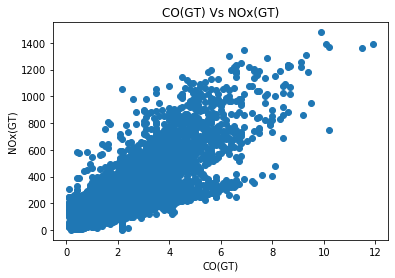

In [94]:
# Analysing relation between CO(GT) and NOx(GT)
X = airQualityData["CO(GT)"]
Y = airQualityData["NOx(GT)"]
plt.xlabel("CO(GT)")
plt.ylabel("NOx(GT)")
plt.title("CO(GT) Vs NOx(GT)")
plt.scatter(X,Y)
plt.show()

In [95]:
dfAir = airQualityData[["CO(GT)", "NOx(GT)"]]
trainFactor = int(0.7 * dfAir.shape[0])

# Extract data for training 
XTrain = dfAir.values[:trainFactor, 1:] 
yTrain = dfAir.values[:trainFactor, 0:1].reshape((-1, 1)) 

# Building linear regression model
reg = LinearRegression() 
reg.fit(XTrain, yTrain)
print("Coefficient: {0} Intercept: {0}".format( str(reg.coef_), str(reg.intercept_)))

print("\n\nTrain model with train data")
print("Number of input records: " + str(len(XTrain)))
yPred = reg.predict(XTrain)
mse = mean_squared_error(yTrain, yPred)
rmse = math.sqrt(mse)
num_data = len(XTrain)
rse = mse * num_data
rse /= num_data - 2
rse = math.sqrt(rse)
r2_score = reg.score(XTrain, yTrain)
print("RMSE: ", rmse)
print("RSE: ", rse)
print("R^2: ", r2_score)


Coefficient: [[0.00551484]] Intercept: [[0.00551484]]


Train model with train data
Number of input records: 6549
RMSE:  0.8527809511280372
RSE:  0.8529111964057922
R^2:  0.5454832601807581


In [96]:
XTest = dfAir.values[trainFactor:, 1:] 
yTest = dfAir.values[trainFactor:, 0:1].reshape((-1, 1))

print("\n\nPredict data for test samples")
print("Number of testing input records: " + str(len(XTest)))
yPred = reg.predict(XTest)
mse = mean_squared_error(yTest, yPred)
rmse = math.sqrt(mse)
num_data = XTest.shape[0]
rse = mse * num_data
rse /= num_data - 2
rse = math.sqrt(rse)
r2_score = reg.score(XTest, yTest)
print("RMSE: ", rmse)
print("RSE: ", rse)
print("R^2: ", r2_score)



Predict data for test samples
Number of testing input records: 2808
RMSE:  0.9203644870614248
RSE:  0.9206924273843426
R^2:  0.5843550102811101


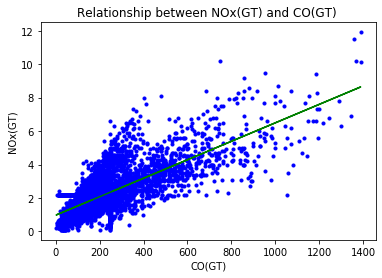

In [97]:
# Plot
area = np.pi * 3
plt.scatter(XTrain, yTrain, s=area, c='blue', alpha=1)
plt.plot(XTrain, (reg.intercept_ + (reg.coef_ * XTrain)), '-', c = 'green')
plt.title('Relationship between NOx(GT) and CO(GT) ')
plt.xlabel('CO(GT)')
plt.ylabel('NOx(GT)')
plt.show()

#### Question 2

In [98]:
dfMultiVariant = airQualityData[["CO(GT)", "PT08.S1(CO)","PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "T", "RH", "AH"]]

# Training data
rows = round((len(dfMultiVariant) * 70) / 100)  
dfMultiVariant = dfMultiVariant.head(rows)  


print("Number of training records: " + str(len(dfMultiVariant)))
# Normalizing the features using mean normalization
dfMultiVariant = (dfMultiVariant - dfMultiVariant.mean())/dfMultiVariant.std()
# Independent variales
X = dfMultiVariant[["PT08.S1(CO)","PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "T", "RH", "AH"]]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones, X),axis=1)

# Dependent variale
Y =  dfMultiVariant[["CO(GT)"]].values
result = np.zeros([1,X.shape[1]])



Number of training records: 6550


##### Q 2.1 Gradient Descent

In [99]:
# Cost evaluation function
def evaluate_cost(X, Y, result):
    summation = np.power(((X @ result.T) - Y),2)
    return np.sum(summation)/(2 * len(X))

# Gradient Descent function
def gradient_descent(X, Y, result, number_of_iteration, learning_rate):
    cost = np.zeros(number_of_iteration)
    for i in range(number_of_iteration):
        result = result - (learning_rate/len(X)) * np.sum(X * (X @ result.T - Y), axis=0)
        cost[i] = evaluate_cost(X, Y, result)
    
    return result, cost

Cost: 0.12226058062742734


Text(0.5, 1.0, 'Error vs. Training epochs')

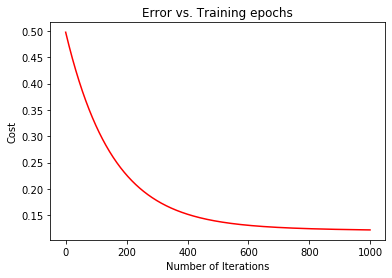

In [100]:
learning_rate = 0.001
number_of_iteration = 1000

g, cost = gradient_descent(X, Y, result, number_of_iteration, learning_rate)

finalCost = evaluate_cost(X, Y, g)
print("Cost: " + str(finalCost))

fig, ax = plt.subplots()  
ax.plot(np.arange(number_of_iteration), cost, 'r')  
ax.set_xlabel('Number of Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training epochs')  

##### Q 2.1 Stochastic Gradient Descent

In [101]:
from sklearn.linear_model import SGDRegressor
import math

In [102]:

XTrain = dfMultiVariant.values[:trainFactor, 1:] 
YTrain = dfMultiVariant.values[:trainFactor, 0:1].reshape((-1, 1)) 
XTest = dfMultiVariant.values[trainFactor:, 1:] 
yTest = dfMultiVariant.values[trainFactor:, 0:1].reshape((-1, 1))

#Building stochastic gradient descent regression model
iterations = 1000
learning_rate = 0.00001
reg = SGDRegressor(max_iter=iterations, tol=learning_rate, eta0=1e-3) 
reg.fit(XTrain, YTrain.ravel())
print("Coefficient: " + str(reg.coef_))
print("Intercept: " + str(reg.intercept_))
print("Number of iterations for convergence: " + str(reg.n_iter_))

print('\n\nError function: Train data')
print("Number of training input records: " + str(XTrain.shape[0]))
yPred = reg.predict(XTrain)
mse = mean_squared_error(YTrain, yPred)
rmse = math.sqrt(mse)
num_data = XTrain.shape[0]
rse = mse * num_data
rse /= num_data - 2
rse = math.sqrt(rse)
r2_score = reg.score(XTrain, YTrain)
print("RMSE: ", rmse)
print("RSE: ", rse)
print("R^2: ", r2_score)

Coefficient: [ 0.32472604  0.38719695  0.31627856  0.11070196  0.11602418 -0.09477315
 -0.05011795 -0.11816929]
Intercept: [9.07052439e-05]
Number of iterations for convergence: 70


Error function: Train data
Number of training input records: 6549
RMSE:  0.4711108923050026
RSE:  0.47118284509538855
R^2:  0.7780358317040258


##### Q 2.1 Mini-batch Gradient Descent

In [108]:
XTrain = dfMultiVariant.values[:trainFactor, 1:] 
yTrain = dfMultiVariant.values[:trainFactor, 0:1].reshape((-1, 1)) 


In [109]:
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  

def mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 

In [110]:
result, error_list = mini_batch_gradient_descent(XTrain, yTrain) 
print("Intercept = ", result[0]) 
print("Coefficients = ", result[1:]) 
  
#Error functions
print('\n\nError function: Train data')
print("Number of training input records: " + str(len(XTrain)))
yPred = hypothesis(XTrain, result) 
mse = mean_squared_error(yTrain, yPred)
rmse = math.sqrt(mse)
num_data = XTrain.shape[0]
rse = mse * num_data
rse /= num_data - 2
rse = math.sqrt(rse)
print("RMSE: ", rmse)
print("RSE: ", rse)


Intercept =  [0.33148882]
Coefficients =  [[ 0.37511007]
 [ 0.32318067]
 [ 0.1005741 ]
 [ 0.12546784]
 [-0.08779905]
 [-0.05253557]
 [-0.102817  ]]


Error function: Train data
Number of training input records: 6549
RMSE:  0.4718462606164502
RSE:  0.4719183257196755
